Sveučilište u Zagrebu  
Fakultet elektrotehnike i računarstva  
  
## Strojno učenje 1 2023/2024  
http://www.fer.unizg.hr/predmet/struce1

------------------------------

### Prva laboratorijska vježba: Linearna regresija

*Verzija: 1.0
Zadnji put ažurirano: 1. 10. 2021.*

(c) 2015-2023 Jan Šnajder, Domagoj Alagić 

Rok za predaju: **22. listopada 2023. u 23:59h**

------------------------------

### Pravila predaje
Predajom vježbe potvrđujete sljedeće točke:
1. Niste od drugoga primili pomoć pri rješavanju vježbe;
2. Atribuirali ste dijelove koda koji su preuzeti s interneta referencirajući ih u komentarima;
3. Niste koristili dijelove koda s interneta koji su specifični za laboratorijsku vježbu;
4. Niste koristili UI-asistente za kodiranje kao npr. GitHub Copilot (uključivo alate generativne UI, kao što je ChatGPT).

**Povreda bilo kojeg od gornjih pravila smatra se prekršajem te povlači akademske sankcije.**

### Upute

Prva laboratorijska vježba sastoji se od sedam zadataka. U nastavku slijedite upute navedene u ćelijama s tekstom. Rješavanje vježbe svodi se na **dopunjavanje ove bilježnice**: umetanja ćelije ili više njih **ispod** teksta zadatka, pisanja odgovarajućeg kôda te evaluiranja ćelija. 

Osigurajte da u potpunosti **razumijete** kôd koji ste napisali. Kod predaje vježbe, morate biti u stanju na zahtjev asistenta (ili demonstratora) preinačiti i ponovno evaluirati Vaš kôd. Nadalje, morate razumjeti teorijske osnove onoga što radite, u okvirima onoga što smo obradili na predavanju. Ispod nekih zadataka možete naći i pitanja koja služe kao smjernice za bolje razumijevanje gradiva (**nemojte pisati** odgovore na pitanja u bilježnicu). Stoga se nemojte ograničiti samo na to da riješite zadatak, nego slobodno eksperimentirajte. To upravo i jest svrha ovih vježbi.

Vježbe trebate raditi **samostalno**. Možete se konzultirati s drugima o načelnom načinu rješavanja, ali u konačnici morate sami odraditi vježbu. U protivnome vježba nema smisla.

In [2]:
# Učitaj osnovne biblioteke...
import numpy as np
import sklearn
import matplotlib.pyplot as plt
%pylab inline

%pylab is deprecated, use %matplotlib inline and import the required libraries.
Populating the interactive namespace from numpy and matplotlib


### 1. Jednostavna regresija

Zadan je skup primjera $\mathcal{D}=\{(x^{(i)},y^{(i)})\}_{i=1}^4 = \{(0,4),(1,1),(2,2),(4,5)\}$. Primjere predstavite matricom $\mathbf{X}$ dimenzija $N\times n$ (u ovom slučaju $4\times 1$) i vektorom oznaka $\textbf{y}$, dimenzija $N\times 1$ (u ovom slučaju $4\times 1$), na sljedeći način:


In [3]:
X = np.array([[0],[1],[2],[4]])
y = np.array([4,1,2,5])

### (a)

Proučite funkciju [`PolynomialFeatures`](http://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.PolynomialFeatures.html) iz biblioteke `sklearn` i upotrijebite je za generiranje matrice dizajna $\mathbf{\Phi}$ koja ne koristi preslikavanje u prostor više dimenzije (samo će svakom primjeru biti dodane *dummy* jedinice; $m=n+1$).


In [4]:
from sklearn.preprocessing import PolynomialFeatures
p = PolynomialFeatures(degree=1, include_bias=True)
psi = p.fit_transform(X)

print(psi)

[[1. 0.]
 [1. 1.]
 [1. 2.]
 [1. 4.]]


### (b)

Upoznajte se s modulom [`linalg`](http://docs.scipy.org/doc/numpy/reference/routines.linalg.html). Izračunajte težine $\mathbf{w}$ modela linearne regresije kao $\mathbf{w}=(\mathbf{\Phi}^\intercal\mathbf{\Phi})^{-1}\mathbf{\Phi}^\intercal\mathbf{y}$. Zatim se uvjerite da isti rezultat možete dobiti izračunom pseudoinverza $\mathbf{\Phi}^+$ matrice dizajna, tj. $\mathbf{w}=\mathbf{\Phi}^+\mathbf{y}$, korištenjem funkcije [`pinv`](http://docs.scipy.org/doc/numpy/reference/generated/numpy.linalg.pinv.html).

In [5]:
from numpy import linalg
w1 = np.linalg.inv(psi.T @ psi) @ psi.T @ y
pseudo = linalg.pinv(psi)
w2 = pseudo @ y
print(w1, w2)
w = w1

[2.2        0.45714286] [2.2        0.45714286]


Radi jasnoće, u nastavku je vektor $\mathbf{x}$ s dodanom *dummy* jedinicom $x_0=1$ označen kao $\tilde{\mathbf{x}}$.

### (c)

Prikažite primjere iz $\mathcal{D}$ i funkciju $h(\tilde{\mathbf{x}})=\mathbf{w}^\intercal\tilde{\mathbf{x}}$. Izračunajte pogrešku učenja prema izrazu $E(h|\mathcal{D})=\frac{1}{2}\sum_{i=1}^N(\tilde{\mathbf{y}}^{(i)} - h(\tilde{\mathbf{x}}^{(i)}))^2$. Možete koristiti funkciju srednje kvadratne pogreške [`mean_squared_error`]( http://scikit-learn.org/stable/modules/generated/sklearn.metrics.mean_squared_error.html) iz modula [`sklearn.metrics`](http://scikit-learn.org/stable/modules/classes.html#module-sklearn.metrics).

**Q:** Gore definirana funkcija pogreške $E(h|\mathcal{D})$ i funkcija srednje kvadratne pogreške nisu posve identične. U čemu je razlika? Koja je "realnija"?

In [6]:
from sklearn.metrics import mean_squared_error
pred = psi @ w.T
print(pred)
print(mean_squared_error(y,pred))

[2.2        2.65714286 3.11428571 4.02857143]
2.0428571428571427


### (d)

Uvjerite se da za primjere iz $\mathcal{D}$ težine $\mathbf{w}$ ne možemo naći rješavanjem sustava $\mathbf{w}=\mathbf{\Phi}^{-1}\mathbf{y}$, već da nam doista treba pseudoinverz.

**Q:** Zašto je to slučaj? Bi li se problem mogao riješiti preslikavanjem primjera u višu dimenziju? Ako da, bi li to uvijek funkcioniralo, neovisno o skupu primjera $\mathcal{D}$? Pokažite na primjeru.

In [7]:
print(np.linalg.inv(psi) @ y)

LinAlgError: Last 2 dimensions of the array must be square

### (e) 

Proučite klasu [`LinearRegression`](http://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html) iz modula [`sklearn.linear_model`](http://scikit-learn.org/stable/modules/classes.html#module-sklearn.linear_model). Provjerite jesu li težine koje izračunava ta funkcija (dostupne pomoću atributa `coef_` i `intercept_`) jednake onima koje ste izračunali gore. Ako nisu, prilagodite kôd tako da jest.

**NB:** Obratite pozornost na to kako klase [`LinearRegression`](http://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html) i [`PolynomialFeatures`](http://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.PolynomialFeatures.html) koriste pomak i osigurajte da ga ne dodajete više puta.

Izračunajte predikcije modela (metoda `predict`) i uvjerite se da je pogreška učenja identična onoj koju ste ranije izračunali.

In [8]:
from sklearn.linear_model import LinearRegression
model = LinearRegression().fit(X,y)
print(model.predict(X))
print(model.coef_, model.intercept_)
print(mean_squared_error(y, model.predict(X)))

[2.2        2.65714286 3.11428571 4.02857143]
[0.45714286] 2.2
2.042857142857143


### 2. Polinomijalna regresija i utjecaj šuma

### (a)

Razmotrimo sada regresiju na većem broju primjera. Definirajte funkciju `make_labels(X, f, noise=0)` koja uzima matricu neoznačenih primjera $\mathbf{X}_{N\times n}$ te generira vektor njihovih oznaka $\mathbf{y}_{N\times 1}$. Oznake se generiraju kao $y^{(i)} = f(x^{(i)})+\mathcal{N}(0,\sigma^2)$, gdje je $f:\mathbb{R}^n\to\mathbb{R}$ stvarna funkcija koja je generirala podatke (koja nam je u stvarnosti nepoznata), a $\sigma$ je standardna devijacija Gaussovog šuma, definirana parametrom `noise`. Za generiranje šuma možete koristiti funkciju [`numpy.random.normal`](https://numpy.org/doc/stable/reference/random/generated/numpy.random.normal.html). 

Generirajte skup za učenje od $N=50$ primjera uniformno distribuiranih u intervalu $[-5,5]$ pomoću funkcije $f(x) = 5 + x -2 x^2 -5 x^3$ uz šum  $\sigma=200$:

In [9]:
from numpy.random import normal
def make_labels(X, f, noise=0):
    return map(lambda X : f(X) +  numpy.random.normal(0,noise), X)
    

In [10]:
def make_instances(x1, x2, N) :
    return np.array([np.array([x]) for x in np.linspace(x1,x2,N)])

In [11]:
def f(x):
    return 5 + x - 2*pow(x, 2) - 5*pow(x, 3)

instances = make_instances(-5, 5, 50)

labels = np.array(list(make_labels(instances, f, 200)))

Prikažite taj skup funkcijom [`scatter`](http://matplotlib.org/api/pyplot_api.html#matplotlib.pyplot.scatter).

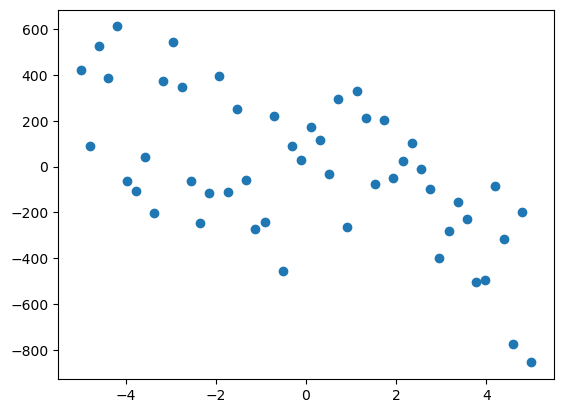

In [12]:
plt.scatter(instances, labels)

### (b)

Trenirajte model polinomijalne regresije stupnja $d=3$. Na istom grafikonu prikažite naučeni model $h(\mathbf{x})=\mathbf{w}^\intercal\tilde{\mathbf{x}}$ i primjere za učenje. Izračunajte pogrešku učenja modela.

error : 51940.269972542934


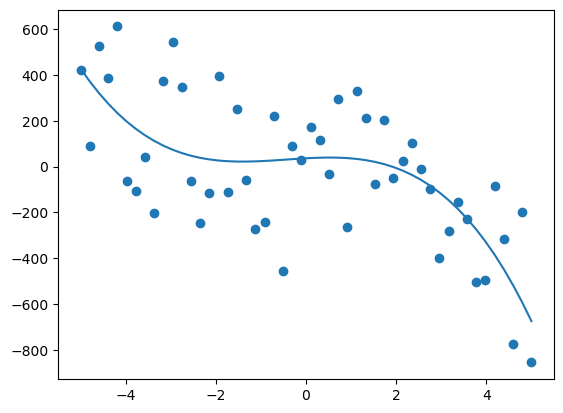

In [13]:
p = PolynomialFeatures(degree=3, include_bias=True)
X = p.fit_transform(instances)
model = LinearRegression().fit(X,labels)
predictions = model.predict(X)
print(f'error : {mean_squared_error(labels, predictions)}')

plt.plot(instances, predictions)
plt.scatter(instances, labels)
plt.show()

### 3. Odabir modela

### (a)

Na skupu podataka iz zadatka 2 trenirajte pet modela linearne regresije $\mathcal{H}_d$ različite složenosti, gdje je $d$ stupanj polinoma, $d\in\{1,3,5,10,20\}$. Prikažite na istome grafikonu skup za učenje i funkcije $h_d(\mathbf{x})$ za svih pet modela (preporučujemo koristiti `plot` unutar `for` petlje). Izračunajte pogrešku učenja svakog od modela.

**Q:** Koji model ima najmanju pogrešku učenja i zašto?

error for H-1: 63772.0563985773
error for H-3: 51940.269972542934
error for H-5: 51032.582305268406
error for H-10: 46350.04105046642
error for H-20: 30209.819832333033


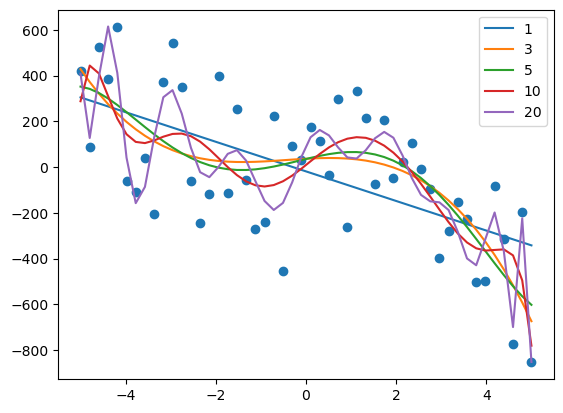

In [14]:
d = [1,3,5,10,20]
for i in range(5):
    p = PolynomialFeatures(degree=d[i], include_bias=True)
    X = p.fit_transform(instances)
    model = LinearRegression().fit(X,labels)
    predictions = model.predict(X)
    print(f'error for H-{d[i]}: {mean_squared_error(labels, predictions)}')
    plt.plot(instances, predictions, label = d[i])

plt.scatter(instances, labels)
plt.legend()
plt.show()

### (b)

Razdvojite skup primjera iz zadatka 2 pomoću funkcije [`model_selection.train_test_split`](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html) na skup za učenja i skup za ispitivanje u omjeru 1:1. Prikažite na jednom grafikonu pogrešku učenja i ispitnu pogrešku za modele polinomijalne regresije $\mathcal{H}_d$, sa stupnjem polinoma $d$ u rasponu $d\in [1,2,\ldots,20]$. Budući da kvadratna pogreška brzo raste za veće stupnjeve polinoma, umjesto da iscrtate izravno iznose pogrešaka, iscrtajte njihove logaritme.

**NB:** Podjela na skupa za učenje i skup za ispitivanje mora za svih dvadeset modela biti identična.

**Q:** Je li rezultat u skladu s očekivanjima? Koji biste model odabrali i zašto?

**Q:** Pokrenite iscrtavanje više puta. U čemu je problem? Bi li problem bio jednako izražen kad bismo imali više primjera? Zašto?

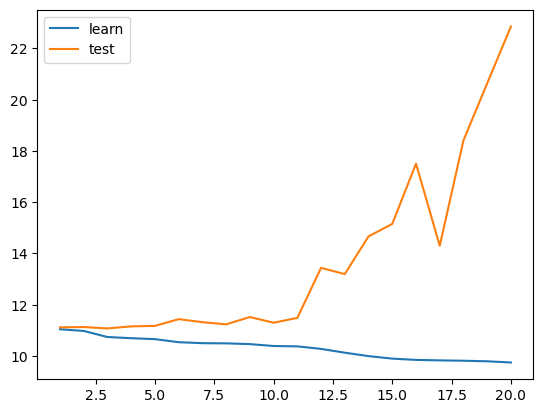

In [15]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(instances, labels, test_size=0.5, random_state=42)

d = [x for x in range(1,21)]
train_errs = []
test_errs = []

for i in range(len(d)):
    p = PolynomialFeatures(degree=d[i], include_bias=True)
    X = p.fit_transform(X_train)
    X2 = p.fit_transform(X_test)
    model = LinearRegression().fit(X,y_train)
    predictions = model.predict(X)

    train_errs.append(mean_squared_error(y_train, predictions))
    predictions2 = model.predict(X2)
    test_errs.append(mean_squared_error(y_test, predictions2))

train_errs = np.log(train_errs)
test_errs = np.log(test_errs)


plt.plot(d, train_errs, label="learn")
plt.plot(d, test_errs, label="test") 
plt.legend()
plt.show()


### (c)

Točnost modela ovisi o (1) njegovoj složenosti (stupanj $d$ polinoma), (2) broju primjera $N$, i (3) količini šuma. Kako biste to analizirali, nacrtajte grafikone pogrešaka kao u 3b, ali za različit $N\in$ (trećina, dvije trećine, sve) i količine šuma $\sigma\in\{100,200,500\}$ (ukupno 9 grafikona). Upotrijebite funkciju [`subplots`](http://matplotlib.org/examples/pylab_examples/subplots_demo.html) kako biste pregledno posložili grafikone u tablicu $3\times 3$. Podatci se generiraju na isti način kao u zadatku 2.

**NB:** Pobrinite se da svi grafikoni budu generirani nad usporedivim skupovima podataka, na sljedeći način. Generirajte najprije svih 1000 primjera, podijelite ih na skupove za učenje i skupove za ispitivanje (dva skupa od po 500 primjera). Zatim i od skupa za učenje i od skupa za ispitivanje načinite tri različite verzije, svaka s drugačijom količinom šuma (ukupno 2x3=6 verzija podataka). Kako bi simulirali veličinu skupa podataka, od tih dobivenih 6 skupova podataka uzorkujte trećinu, dvije trećine i sve podatke. Time ste dobili 18 skupova podataka -- skup za učenje i za testiranje za svaki od devet grafova.

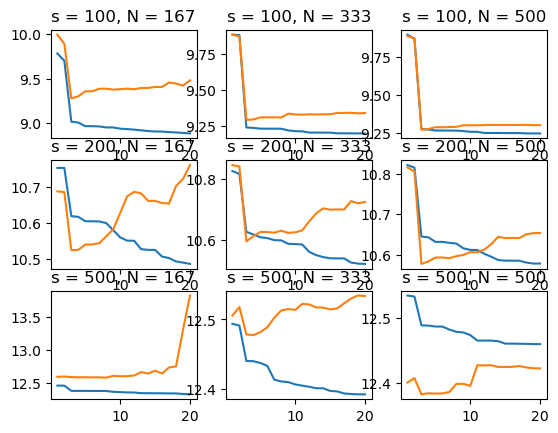

In [16]:
import random

X = make_instances(-5, 5, 1000)
s = [100, 200, 500]
N = [167,333,500]
fi, axarr = plt.subplots(3, 3)

for i in range(len(s)):
    y = list(make_labels(X,f,s[i]))
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5, random_state=42)
    for j in range(len(N)):
        ind_tr = random.sample(range(len(y_train)), N[j])
        final_X_train = [X_train[k] for k in ind_tr]
        final_Y_train = [y_train[k] for k in ind_tr]
        final_X_test = [X_test[k] for k in ind_tr]
        final_Y_test = [y_test[k] for k in ind_tr]
        
        train_errs = []
        test_errs = []

        for l in range(len(d)):
            p = PolynomialFeatures(degree=d[l], include_bias=True)
            X1 = p.fit_transform(final_X_train)
            X2 = p.fit_transform(final_X_test)
            model = LinearRegression().fit(X1,final_Y_train)
            predictions = model.predict(X1)

            train_errs.append(mean_squared_error(final_Y_train, predictions))
            predictions2 = model.predict(X2)
            test_errs.append(mean_squared_error(final_Y_test, predictions2))

        train_errs = np.log(train_errs)
        test_errs = np.log(test_errs)
        
        axarr[i,j].plot(d, train_errs)
        axarr[i,j].plot(d, test_errs)
        axarr[i, j].set_title(f's = {s[i]}, N = {N[j]}')


***Q:*** Jesu li rezultati očekivani? Obrazložite.

### 4. Regularizirana regresija

### (a)

U gornjim eksperimentima nismo koristili **regularizaciju**. Vratimo se najprije na primjer iz zadatka 1. Na primjerima iz tog zadatka izračunajte težine $\mathbf{w}$ za polinomijalni regresijski model stupnja $d=3$ uz L2-regularizaciju (tzv. *ridge regression*), prema izrazu $\mathbf{w}=(\mathbf{\Phi}^\intercal\mathbf{\Phi}+\lambda\mathbf{I})^{-1}\mathbf{\Phi}^\intercal\mathbf{y}$. Napravite izračun težina za regularizacijske faktore $\lambda=0$, $\lambda=1$ i $\lambda=10$ te usporedite dobivene težine.

**Q:** Kojih je dimenzija matrica koju treba invertirati?

**Q:** Po čemu se razlikuju dobivene težine i je li ta razlika očekivana? Obrazložite.

In [17]:
X = np.array([[0],[1],[2],[4]])
y = np.array([4,1,2,5])
l1 = 0
l2 = 1
l3 = 10

p = PolynomialFeatures(degree=3, include_bias=True)
psi = p.fit_transform(X)

I = np.eye(4)
I[0][0] = 0

w1 = np.linalg.inv(psi.T @ psi + l1 * I ) @ psi.T @ y
w2 = np.linalg.inv(psi.T @ psi + l2 * I ) @ psi.T @ y
w3 = np.linalg.inv(psi.T @ psi + l3 * I ) @ psi.T @ y

print(w1, w2, w3)
print(f'shape: {(psi.T @ psi + l1 * I ).shape}')

[ 4.         -5.91666667  3.375      -0.45833333] [ 3.05696145 -0.69079365 -0.2831746   0.1445805 ] [ 2.49444184 -0.15897295 -0.13423067  0.0815601 ]
shape: (4, 4)


### (b)

Proučite klasu [`Ridge`](http://scikit-learn.org/stable/modules/generated/sklearn.linear_model.Ridge.html#sklearn.linear_model.Ridge) iz modula [`sklearn.linear_model`](http://scikit-learn.org/stable/modules/classes.html#module-sklearn.linear_model), koja implementira L2-regularizirani regresijski model. Parametar $\alpha$ odgovara parametru $\lambda$. Primijenite model na istim primjerima kao u prethodnom zadatku i ispišite težine $\mathbf{w}$ (atributi `coef_` i `intercept_`). Ponovno, pripazite na pomak.

**Q:** Jesu li težine identične onima iz zadatka 4a? Ako nisu, objasnite zašto je to tako i kako biste to popravili.

In [21]:
from sklearn.linear_model import Ridge

impl1 = Ridge(alpha=l1).fit(psi,y)
impl2 = Ridge(alpha=l2).fit(psi,y)
impl3 = Ridge(alpha=l3).fit(psi,y)
impl1.coef_[0] += impl1.intercept_
impl2.coef_[0] += impl2.intercept_
impl3.coef_[0] += impl3.intercept_
print(impl1.coef_)
print(impl2.coef_)
print(impl3.coef_)

[ 4.         -5.91666667  3.375      -0.45833333]
[ 3.05696145 -0.69079365 -0.2831746   0.1445805 ]
[ 2.49444184 -0.15897295 -0.13423067  0.0815601 ]


### (c)

Vratimo se na slučaj $N=50$ slučajno generiranih primjera iz zadatka 2. Trenirajte modele polinomijalne regresije $\mathcal{H}_{\lambda,d}$ za $\lambda\in\{0,100\}$ i $d\in\{2,10\}$ (ukupno četiri modela). Skicirajte pripadne funkcije $h(\mathbf{x})$ i primjere (na jednom grafikonu; preporučujemo koristiti `plot` unutar `for` petlje).

**Q:** Jesu li rezultati očekivani? Obrazložite.

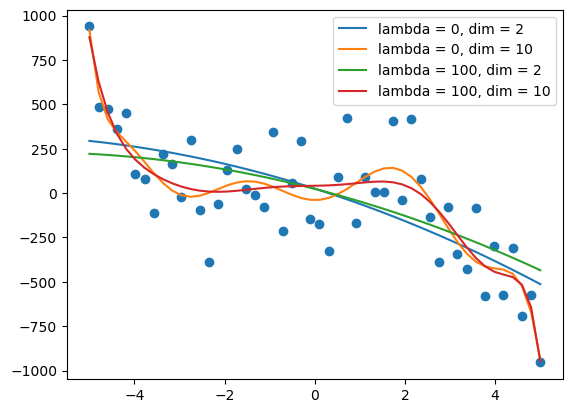

In [22]:
d = [2,10]
l = [0,100]
instances = make_instances(-5, 5, 50)
labels = np.array(list(make_labels(instances, f, 200)))
plt.scatter(instances, labels)
for i in range(len(l)):
    l1 = l[i]
    for j in range(len(d)):
        I = np.eye(d[j] + 1)
        I[0][0] = 0
        p = PolynomialFeatures(degree=d[j], include_bias=True)
        psi = p.fit_transform(instances)
        w1 = np.linalg.inv(psi.T @ psi + l1 * I ) @ psi.T @ labels
        predictions = psi @ w1
        plt.plot(instances,predictions,label=f'lambda = {l[i]}, dim = {d[j]}')


        

plt.legend()
plt.show()
        
        



### (d)

Kao u zadataku 3b, razdvojite primjere na skup za učenje i skup za ispitivanje u omjeru 1:1. Prikažite krivulje logaritama pogreške učenja i ispitne pogreške u ovisnosti za model $\mathcal{H}_{d=10,\lambda}$, podešavajući faktor regularizacije $\lambda$ u rasponu $\lambda\in\{0,1,\dots,50\}$.

**Q:** Kojoj strani na grafikonu odgovara područje prenaučenosti, a kojoj podnaučenosti? Zašto?

**Q:** Koju biste vrijednosti za $\lambda$ izabrali na temelju ovih grafikona i zašto?


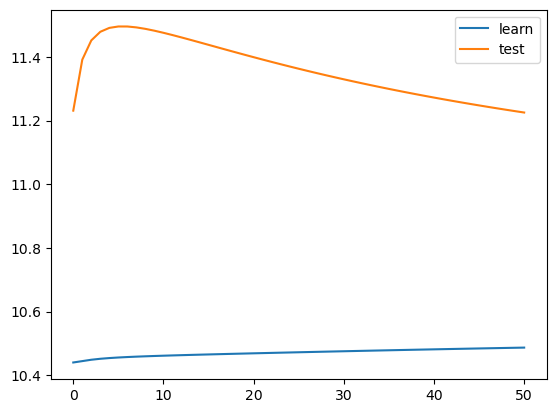

In [23]:
X_train, X_test, y_train, y_test = train_test_split(instances, labels, test_size=0.5, random_state=42)

d = 10
l = [i for i in range(51)]
train_errs = []
test_errs = []
I = np.eye(11)
I[0][0] = 0

for i in range(len(l)):
    p = PolynomialFeatures(degree=d, include_bias=True)
    X = p.fit_transform(X_train)
    X2 = p.fit_transform(X_test)
    w = np.linalg.inv(X.T @ X + l[i] * I ) @ X.T @ y_train
    predictions = X @ w
    train_errs.append(mean_squared_error(y_train, predictions))
    predictions2 = X2 @ w
    test_errs.append(mean_squared_error(y_test, predictions2))

train_errs = np.log(train_errs)
test_errs = np.log(test_errs)


plt.plot(l, train_errs, label="learn")
plt.plot(l, test_errs, label="test") 
plt.legend()
plt.show()


### 5. L1-regularizacija i L2-regularizacija

Svrha regularizacije jest potiskivanje težina modela $\mathbf{w}$ prema nuli, kako bi model bio što jednostavniji. Složenost modela može se okarakterizirati normom pripadnog vektora težina $\mathbf{w}$, i to tipično L2-normom ili L1-normom. Za jednom trenirani model možemo izračunati i broj ne-nul značajki, ili L0-normu, pomoću sljedeće funkcije koja prima vektor težina $\mathbf{w}$:

In [24]:
def nonzeroes(coef, tol=1e-6): 
    return len(coef) - len(coef[np.isclose(0, coef, atol=tol)])

### (a)

Za ovaj zadatak upotrijebite skup za učenje i skup za testiranje iz zadatka 3b. Trenirajte modele **L2-regularizirane** polinomijalne regresije stupnja $d=5$, mijenjajući hiperparametar $\lambda$ u rasponu $\{1,2,\dots,100\}$. Za svaki od treniranih modela izračunajte L{0,1,2}-norme vektora težina $\mathbf{w}$ te ih prikažite kao funkciju od $\lambda$. Pripazite što točno šaljete u funkciju za izračun normi.

**Q:** Objasnite oblik obiju krivulja. Hoće li krivulja za $\|\mathbf{w}\|_2$ doseći nulu? Zašto? Je li to problem? Zašto?

**Q:** Za $\lambda=100$, koliki je postotak težina modela jednak nuli, odnosno koliko je model rijedak?

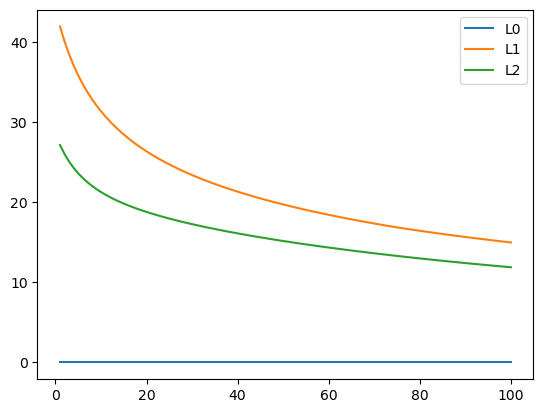

In [25]:
from sklearn.linear_model import Ridge

instances = make_instances(-5, 5, 50)
labels = np.array(list(make_labels(instances, f, 200)))
X_train, X_test, y_train, y_test = train_test_split(instances, labels, test_size=0.5, random_state = 42)

d = 5
l = [i for i in range(1,101)]
l0= []
l1 = []
l2 = []
p = PolynomialFeatures(degree=d, include_bias=True)
X = p.fit_transform(X_train)

for i in range(len(l)):
    impl1 = Ridge(alpha=l[i]).fit(X,y_train)
    l0.append(nonzeroes(impl1.coef_ ))
    l1.append(np.sum(np.abs(impl1.coef_)))
    l2.append(np.sqrt(np.sum(np.square(impl1.coef_ ))))

plt.plot(l,l0, label="L0")
plt.plot(l,l1, label = "L1")
plt.plot(l,l2, label = "L2")
plt.legend()
plt.show()




### (b)

Glavna prednost L1-regularizirane regresije (ili *LASSO regression*) nad L2-regulariziranom regresijom jest u tome što L1-regularizirana regresija rezultira **rijetkim modelima** (engl. *sparse models*), odnosno modelima kod kojih su mnoge težine pritegnute na nulu. Pokažite da je to doista tako, ponovivši gornji eksperiment s **L1-regulariziranom** regresijom, implementiranom u klasi  [`Lasso`](http://scikit-learn.org/stable/modules/generated/sklearn.linear_model.Lasso.html) u modulu [`sklearn.linear_model`](http://scikit-learn.org/stable/modules/classes.html#module-sklearn.linear_model).

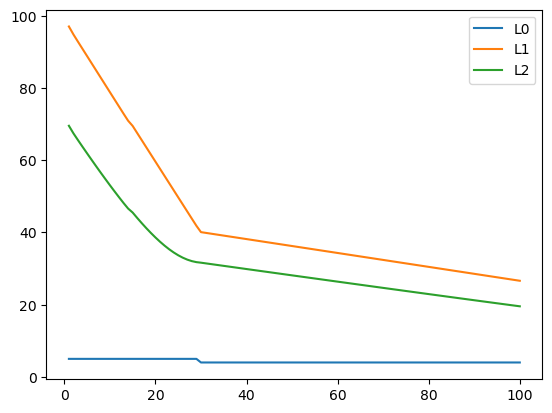

In [26]:
from sklearn.linear_model import Lasso

instances = make_instances(-5, 5, 50)
labels = np.array(list(make_labels(instances, f, 200)))

X_train, X_test, y_train, y_test = train_test_split(instances, labels, test_size=0.5, random_state = 42)

d = 5
l = [i for i in range(1,101)]
l0= []
l1 = []
l2 = []

p = PolynomialFeatures(degree=d, include_bias=True)
X = p.fit_transform(X_train)
for i in range(len(l)):
    impl1 = Lasso(alpha=l[i]).fit(X, y_train)
    l0.append(nonzeroes(impl1.coef_ ))
    l1.append(np.sum(np.abs(impl1.coef_ )))
    l2.append(np.sqrt(np.sum(np.square(impl1.coef_ ))))

plt.plot(l,l0, label="L0")
plt.plot(l,l1, label = "L1")
plt.plot(l,l2, label = "L2")
plt.legend()
plt.show()

### 6. Značajke različitih skala

Često se u praksi možemo susreti sa podatcima u kojima sve značajke nisu jednakih magnituda. Primjer jednog takvog skupa je regresijski skup podataka `grades` u kojem se predviđa prosjek ocjena studenta na studiju (1--5) na temelju dvije značajke: bodova na prijamnom ispitu (1--3000) i prosjeka ocjena u srednjoj školi. Prosjek ocjena na studiju izračunat je kao težinska suma ove dvije značajke uz dodani šum.

Koristite sljedeći kôd kako biste generirali ovaj skup podataka.

In [27]:
n_data_points = 500
np.random.seed(69)

# Generiraj podatke o bodovima na prijamnom ispitu koristeći normalnu razdiobu i ograniči ih na interval [1, 3000].
exam_score = np.random.normal(loc=1500.0, scale = 500.0, size = n_data_points) 
exam_score = np.round(exam_score)
exam_score[exam_score > 3000] = 3000
exam_score[exam_score < 0] = 0

# Generiraj podatke o ocjenama iz srednje škole koristeći normalnu razdiobu i ograniči ih na interval [1, 5].
grade_in_highschool = np.random.normal(loc=3, scale = 2.0, size = n_data_points)
grade_in_highschool[grade_in_highschool > 5] = 5
grade_in_highschool[grade_in_highschool < 1] = 1

# Matrica dizajna.
grades_X = np.array([exam_score,grade_in_highschool]).T

# Završno, generiraj izlazne vrijednosti.
rand_noise = np.random.normal(loc=0.0, scale = 0.5, size = n_data_points)
exam_influence = 0.9
grades_y = ((exam_score / 3000.0) * (exam_influence) + (grade_in_highschool / 5.0) \
            * (1.0 - exam_influence)) * 5.0 + rand_noise
grades_y[grades_y < 1] = 1
grades_y[grades_y > 5] = 5

### a)

Iscrtajte ovisnost ciljne vrijednosti (y-os) o prvoj i o drugoj značajki (x-os). Iscrtajte dva odvojena grafa.

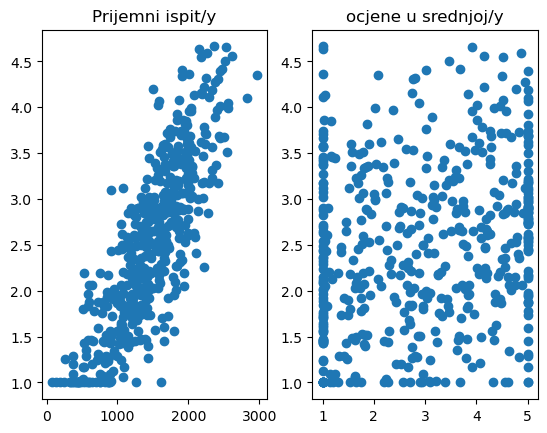

In [28]:
fi,arr = plt.subplots(1,2)

arr[0].scatter(exam_score, grades_y)
arr[0].set_title('Prijemni ispit/y')
arr[1].scatter(grade_in_highschool, grades_y)
arr[1].set_title('ocjene u srednjoj/y')
plt.show()

### b)

Naučite model L2-regularizirane regresije ($\lambda = 0.01$), na podacima `grades_X` i `grades_y`:

In [29]:
l = 0.01
impl1 = Ridge(alpha=l).fit(grades_X,grades_y)

Sada ponovite gornji eksperiment, ali prvo skalirajte podatke `grades_X` i `grades_y` i spremite ih u varijable `grades_X_fixed` i `grades_y_fixed`. Za tu svrhu, koristite [`StandardScaler`](http://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.StandardScaler.html).

In [30]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaler.fit(grades_X)
grades_X_fixed = scaler.transform(grades_X)

scaler.fit(grades_y.reshape(-1, 1))
grades_y_fixed = scaler.transform(grades_y.reshape(-1, 1))

impl1 = Ridge(alpha=l).fit(grades_X_fixed,grades_y_fixed)

print(impl1.coef_)

[[0.81630375 0.15167761]]


**Q:** Gledajući grafikone iz podzadatka (a), koja značajka bi trebala imati veću magnitudu, odnosno važnost pri predikciji prosjeka na studiju? Odgovaraju li težine Vašoj intuiciji? Objasnite.  

### 7. Multikolinearnost

### a)

Izradite skup podataka `grades_X_fixed_colinear` tako što ćete u skupu `grades_X_fixed` iz
zadatka *7b* duplicirati zadnji stupac (ocjenu iz srednje škole). Time smo efektivno uveli savršenu multikolinearnost.

In [31]:
grades_X_fixed_colinear = np.column_stack((grades_X_fixed, grades_X_fixed[:, 1]))

Ponovno, naučite na ovom skupu L2-regularizirani model regresije ($\lambda = 0.01$).

In [32]:
impl1 = Ridge(alpha=l).fit(grades_X_fixed_colinear,grades_y_fixed)

print(impl1.coef_)

[[0.81630364 0.07583957 0.07583957]]


**Q:** Usporedite iznose težina s onima koje ste dobili u zadatku *7b*. Što se dogodilo?

### b)

Slučajno uzorkujte 50% elemenata iz skupa `grades_X_fixed_colinear` i naučite dva modela L2-regularizirane regresije, jedan s $\lambda=0.01$ i jedan s $\lambda=1000$). Ponovite ovaj pokus 10 puta (svaki put s drugim podskupom od 50% elemenata).  Za svaki model, ispišite dobiveni vektor težina u svih 10 ponavljanja te ispišite standardnu devijaciju vrijednosti svake od težina (ukupno šest standardnih devijacija, svaka dobivena nad 10 vrijednosti).

In [33]:
l1 = 0.01
l2 = 1000
std_l1 = []
std_l2 = []
for i in range(10):
    X_train, X_test, y_train, y_test = train_test_split(grades_X_fixed_colinear, grades_y_fixed, test_size=0.5)
    impl1 = Ridge(alpha=l1).fit(X_train,y_train)
    impl2 = Ridge(alpha=l2).fit(X_train,y_train)
    print(np.squeeze(impl1.coef_), np.squeeze(impl2.coef_))
    std_l1.append(np.squeeze(impl1.coef_))
    std_l2.append(np.squeeze(impl2.coef_))

std_l1 = np.array(std_l1)
std_l2 = np.array(std_l2)
std_l1= np.std(std_l1, axis=0)
std_l2= np.std(std_l2, axis=0)
print(f'standardna devijacija :{std_l1}, {std_l2}')


[0.79385128 0.06504303 0.06504303] [0.16436364 0.03812874 0.03812874]
[0.80739011 0.0761075  0.0761075 ] [0.15992321 0.02415424 0.02415424]
[0.814158   0.07673386 0.07673386] [0.16128257 0.02717137 0.02717137]
[0.83265053 0.07483515 0.07483515] [0.16579999 0.03405283 0.03405283]
[0.79735626 0.08013669 0.08013669] [0.15703356 0.02664742 0.02664742]
[0.81845427 0.04525193 0.04525193] [0.17833349 0.03188297 0.03188297]
[0.80086373 0.0614553  0.0614553 ] [0.15563723 0.022474   0.022474  ]
[0.81216485 0.06648337 0.06648337] [0.16174675 0.03077003 0.03077003]
[0.81501911 0.04444567 0.04444567] [0.16591703 0.01772788 0.01772788]
[0.81925961 0.07443972 0.07443972] [0.16617211 0.03087282 0.03087282]
standardna devijacija :[0.01102672 0.01216945 0.01216945], [0.00602766 0.00567524 0.00567524]


**Q:** Kako regularizacija utječe na stabilnost težina?  
**Q:** Jesu li koeficijenti jednakih magnituda kao u prethodnom pokusu? Objasnite zašto.